In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
from scipy.stats import skew, boxcox
from mpl_toolkits.mplot3d import Axes3D
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing 
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score


import warnings
warnings.filterwarnings("ignore")

In [61]:
# import data
dataset = pd.read_csv(r"C:\Users\ayori\OneDrive - MNSCU\Documents\Spring 2021\THESIS\creditcard.csv", encoding='latin1')

In [62]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [65]:
#checking for null values in the data
dataset.isnull().values.any()

False

In [66]:
dataset.shape

(284807, 31)

0    284315
1       492
Name: Class, dtype: int64

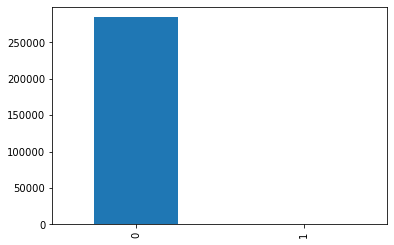

In [67]:
#How balanced are the classes, i.e. how common are fraudulent transactions?
# '0' represent no fraud activities
# '1' represent number of fraud activities

#According to the output below, this dataset is highly imbalanced. 

count = pd.value_counts(dataset['Class'], sort = True).sort_index()
count.plot(kind = 'bar')
count

In [9]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
dataset['Class'].unique()

array([0, 1], dtype=int64)

In [68]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


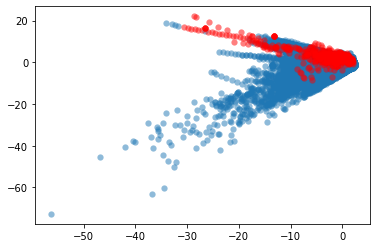

In [155]:
# Plot how fraud and non-fraud cases are scattered 

plt.scatter(dataset.loc[dataset['Class'] == 0]['V1'], dataset.loc[dataset['Class'] == 0]['V2'], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(dataset.loc[dataset['Class'] == 1]['V1'], dataset.loc[dataset['Class'] == 1]['V2'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.show()

In [93]:
#Splitting the dataset

from sklearn.model_selection import train_test_split
X = dataset.drop(['Class'], axis=1)
y = dataset[['Class']]

# splitting dataset to train & test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [94]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364, 1)
(85443, 1)


In [95]:
train = pd.concat([X_train, y_train],axis=1)
test = pd.concat([X_test, y_test],axis=1)

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,199019.0,94824.845191,47496.606208,0.0,54150.5,84642.0,139342.0,172792.0
1,345.0,80175.200000,47174.239362,406.0,41237.0,72327.0,125200.0,170348.0


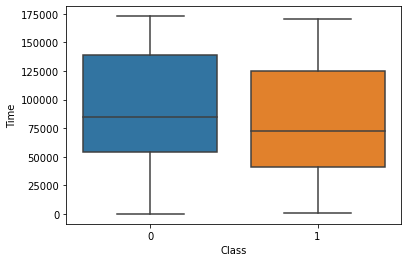

In [96]:
# Exploratory Data Analysis (EDA) and Feature Engeneering


# Time itself doesn't seem to determine class well. 
# We will feature a new variable which is the time difference between transaction and the precede transaction. 
# we will combine train and test first, do the feature engineering, then split the dataset again.

sns.boxplot(x="Class", y="Time",data=train)
train.groupby("Class").Time.describe()

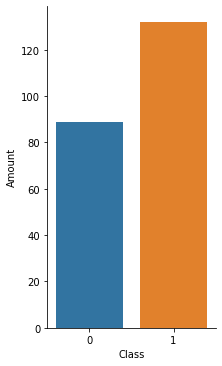

In [97]:
# Exploring with Amount and Class 

sns.factorplot(x="Class", y="Amount", data=train, kind="bar", ci=None, aspect=.6)

In [158]:
# Seperate total data into non-fraud and fraud cases in the class

dataset_nonfraud = dataset[dataset.Class == 0] #save non-fraud df observations into a separate dataset
dataset_fraud = dataset[dataset.Class == 1] #do the same for frauds

In [159]:
# Summarize statistics and see differences between fraud and normal transactions
# Compare the Amount of transactions in two separate datasets
# See if we can flag fraud cases by transaction amount

# Summary:
# The mean transaction amout among fraud cases is 122 USD, and is 88 
# among non-fraud cases. And the difference is statistically significant.

print(dataset_nonfraud.Amount.describe())
print('_'*25)
print(dataset_fraud.Amount.describe())

# Import the module
from scipy import stats
F, p = stats.f_oneway(dataset['Amount'][dataset['Class'] == 0], dataset['Amount'][dataset['Class'] == 1])
print("F:", F)
print("p:",p)

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
_________________________
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
F: 9.033344712018891
p: 0.0026512206498171095


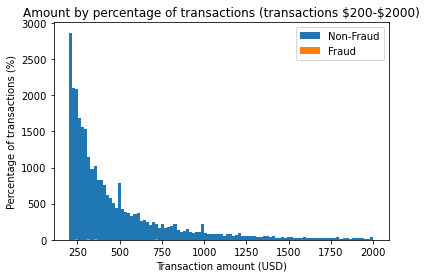

In [161]:
# Plot of high value transactions($200-$2000)

bins = np.linspace(200, 2000, 100)
plt.hist(dataset_nonfraud.Amount, bins, alpha=1, label='Non-Fraud')
plt.hist(dataset_fraud.Amount, bins, alpha=1, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,199019.0,88.592316,246.081586,0.0,5.69,22.00,77.5,19656.53
1,345.0,132.085652,255.889978,0.0,1.00,19.04,118.3,1809.68


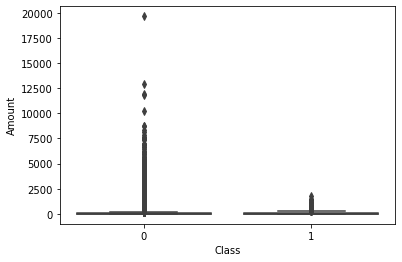

In [98]:
sns.boxplot(x="Class", y="Amount", data=train)
train.groupby('Class').Amount.describe()

In [21]:
# Even though average amount of non-fraud is greater than fraud, 
# transaction of large amount however are mostly fraud, which follows our instinct about fraud. 
# We will create a binary factor indicating transaction with large amount, with a threshold of 2000.


pd.options.mode.chained_assignment = None
def amount_threshold(x):
    if x > 2000: return 1
    else: return 0
    
X_train['Large_Amount'] = X_train['Amount'].apply(amount_threshold)
X_validate['Large_Amount'] = X_validate['Amount'].apply(amount_threshold)
X_test['Large_Amount'] = X_test['Amount'].apply(amount_threshold)

In [99]:
# Comparing the different quantiles, it looks like the amounts are very right-skewed. 
# To verify this, plot a histogram of the transaction amounts:

X_train['Amount'].describe()

count    199364.000000
mean         88.667581
std         246.104869
min           0.000000
25%           5.650000
50%          22.000000
75%          77.580000
max       19656.530000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Transaction Amounts')

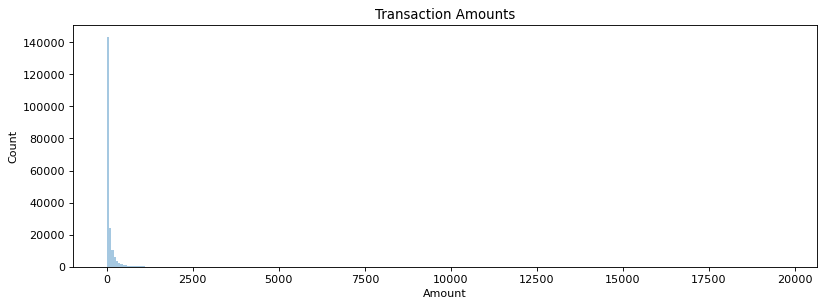

In [100]:
# The histogram is hard to read due to some outliers we can't see. A boxplot will show the outliers:

plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('Transaction Amounts')

Text(0.5, 1.0, 'Transaction Amounts')

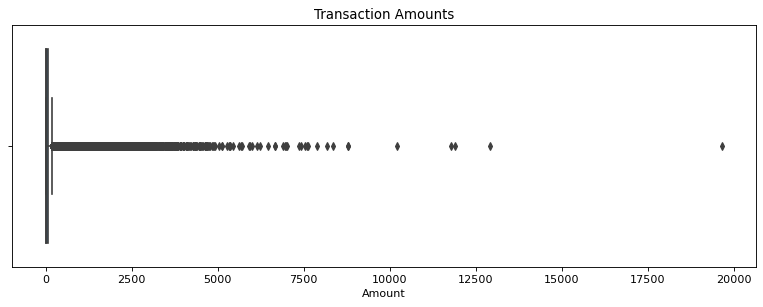

In [101]:
# Boxplot for the amount to check for outliers
# We can see there are no outliers on the left and many outliers on the right. 

plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')

In [102]:
# So the amounts certainly seem right-skewed. We can calculate the skewness to be sure

X_train['Amount'].skew()

13.632237777131827

In [103]:
# That's a strong right skew. Let's use a power transform to bring the transaction amounts closer to a normal distribution.
# We'll use the Box-Cox transform in SciPy, but some of the amounts are zero (min = 0 above), 
# so we need to shift the amounts first to make them positive. We'll shift by a very small amount, just 10^-9.

X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-9 # Shift all amounts by 1e-9

In [104]:
# Perform the Box-Cox transform on Amount:

X_train.loc[:,'Amount'] = preprocessing.scale(boxcox(X_train['Amount']+1)[0])

Text(0.5, 1.0, 'Transaction Amounts (Box-Cox Transformed)')

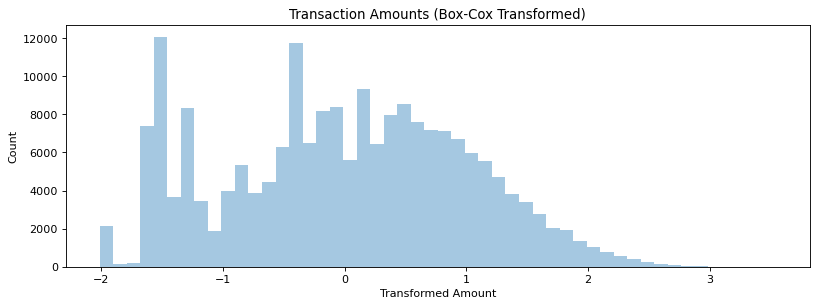

In [105]:
# Plotting the newly transformed Amount

plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], kde=False)
plt.xlabel('Transformed Amount')
plt.ylabel('Count')
plt.title('Transaction Amounts (Box-Cox Transformed)')

In [106]:
# Few descriptive statistics for the variable TIME

X_train['Time'].describe()

count    199364.000000
mean      94799.493936
std       47499.835491
min           0.000000
25%       54126.000000
50%       84633.500000
75%      139334.250000
max      172792.000000
Name: Time, dtype: float64

In [107]:
# Let's convert the time from seconds to hours to ease the interpretation

X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600

In [108]:
# What is the time of the last transaction, in days?

X_train['Time'].max() / 24

1.9999074074074075

Text(0.5, 1.0, 'Transaction Times')

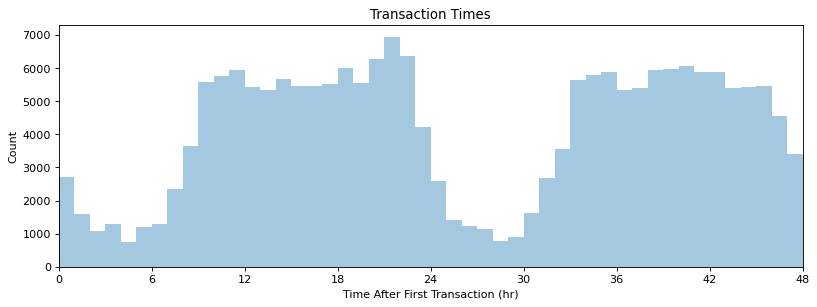

In [109]:
# So the transactions indeed occur over a two-day period. 
# Next let's plot a histogram of transaction times, with one bin per hour:


plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))
plt.xlabel('Time After First Transaction (hr)')
plt.ylabel('Count')
plt.title('Transaction Times')

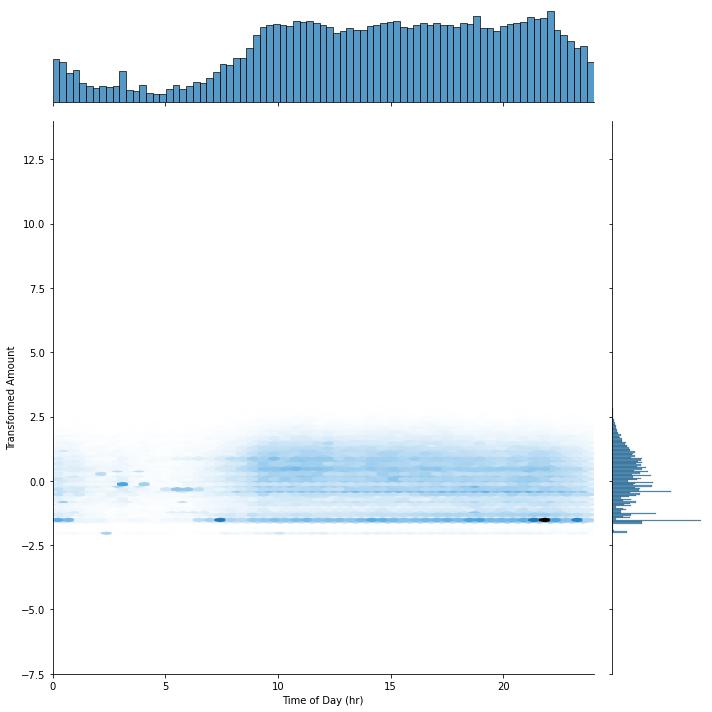

In [110]:
# Time vs. Amount

# Is there a relationship between the transaction amounts and the time of day? 
# Let's explore this question with a joint histogram using hexagonal bins. 
# For this plot, we convert each transaction time to the hour of the day on which it occurred.

sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], kind='hex', 
              size=10, xlim=(0,24), 
              ylim=(-7.5,14)).set_axis_labels('Time of Day (hr)','Transformed Amount')



# The transaction amounts appear to be similarly distributed throughout the daytime hours. 
# However, in the earliest hours of the day, around 5-7 AM, amounts around 2.5 are the most common 
# (recall this is a Box-Cox transformed value). Perhaps everyone's buying their morning coffee?

In [111]:
# Let's compare the descriptive stats of the PCA variables V1-V28.

PCA = ['V%i' % k for k in range(1,29)]

In [35]:
X_train[PCA].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,...,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000,132975.000000
mean,0.004096,0.001085,-0.001156,-0.005731,0.000831,0.002514,-0.002960,-0.000222,-0.001269,0.001028,...,-0.001104,0.001169,0.000432,0.001542,0.000118,0.000958,0.000228,0.000725,0.000478,-0.000663
std,1.935215,1.613830,1.512648,1.409646,1.389991,1.337885,1.244904,1.190400,1.097081,1.082321,...,0.810538,0.747319,0.730236,0.724613,0.604652,0.606427,0.518618,0.483592,0.406189,0.317456
min,-37.054295,-48.060856,-48.325589,-5.683171,-113.743307,-23.496714,-37.060311,-50.943369,-11.126624,-23.228255,...,-4.392421,-54.497720,-22.665685,-8.887017,-36.666000,-2.824849,-6.712624,-2.241620,-22.565679,-15.430084
25%,-0.920116,-0.596844,-0.895146,-0.849727,-0.694862,-0.768423,-0.555830,-0.208123,-0.645031,-0.532992,...,-0.455352,-0.211880,-0.228148,-0.539710,-0.160619,-0.354084,-0.316379,-0.326844,-0.070672,-0.052854
50%,0.021455,0.063400,0.179259,-0.022975,-0.055713,-0.275047,0.038128,0.021941,-0.052724,-0.091929,...,0.002835,-0.061878,-0.029256,0.007547,-0.010820,0.041329,0.017085,-0.051979,0.001190,0.011166
75%,1.317512,0.803601,1.023484,0.737304,0.613291,0.401476,0.569456,0.329914,0.596597,0.457687,...,0.456068,0.133373,0.186438,0.530488,0.146874,0.440897,0.349906,0.242213,0.090557,0.078579
max,2.451888,19.167239,9.382558,15.304184,34.099309,73.301626,120.589494,20.007208,15.594995,23.745136,...,5.591971,23.649095,27.202839,8.272233,22.083545,4.584549,6.070850,3.463246,31.612198,15.870474


Text(0.5, 1.0, 'V1-V28 Means')

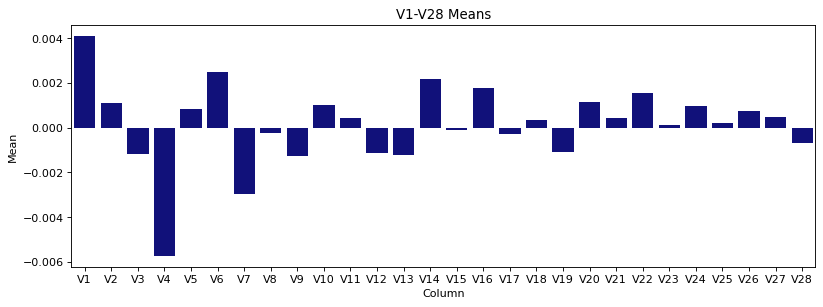

In [36]:
# The Mean
# It's very difficult to interpret the table above, so let's make some visualizations.
# We'll start by plotting the means:
# All of V1-V28 have approximately zero mean.
# Now plot the standard deviations:

plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=PCA, y=X_train[PCA].mean(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Mean')
plt.title('V1-V28 Means')

Text(0.5, 1.0, 'V1-V28 Standard Deviations')

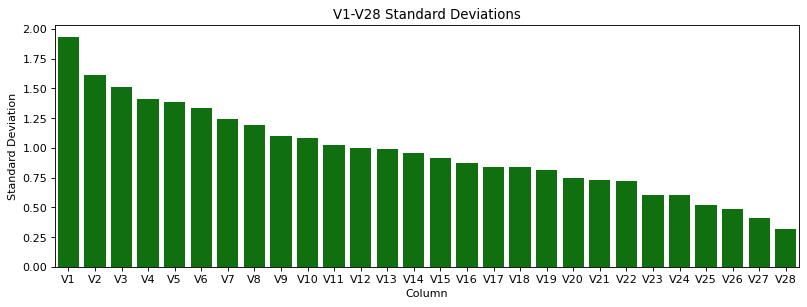

In [37]:
# The Standard Deviation
# The PCA variables have roughly unit variance.
# As low as ~0.3 and as high as ~1.9. 
# Let Plot the skewnesses next:


plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=PCA, y=X_train[PCA].std(), color='green')
plt.xlabel('Column')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 Standard Deviations')

Text(0.5, 1.0, 'V1-V28 Kurtoses')

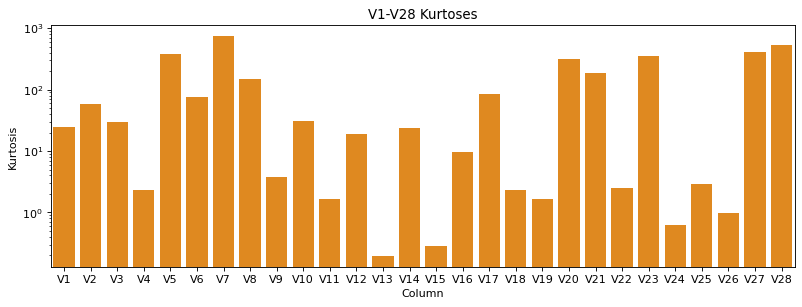

In [38]:
# PCA Skewness

# Ploting Skewness for all the PCA using the Kurtosis method
#The kurtosis method employed in pandas is Fisher’s definition, for which the standard normal distribution has kurtosis 0

plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=PCA, y=X_train[PCA].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')

Text(0.5, 1.0, 'V1-V28 Medians')

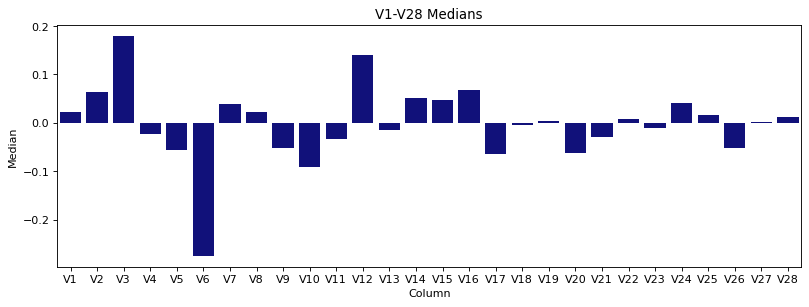

In [39]:
# We've learned that many of the PCA variables are heavy-tailed. 
# The large numbers of outliers in V1-V28 motivates us to consider robust descriptive statistics. 
# Let's plot the medians:

# From the result below, The medians are also roughly zero.

plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=PCA, y=X_train[PCA].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')

Text(0.5, 1.0, 'V1-V28 IQRs')

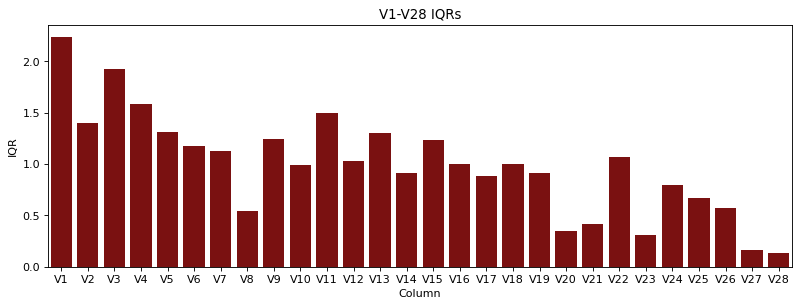

In [71]:
# let's look at the interquartile ranges (IQR)*
# From the Output below, The IQRs of V1-V28 are on a similar scale as the standard deviations.


plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=PCA, y=X_train[PCA].quantile(0.75) - X_train[PCA].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')

In [112]:
# Mutual Information
# Dependency between Fraud and the Predictors to know which of the predictor is correclated with the Class
# Mutual information of 0 indicates no dependence, and higher values indicate higher dependence.
# "mutual information methods can capture any kind of statistical dependency

# The five most correlated variables with Class are, in decreasing order, V17, V14, V10, V12, and V11.


from sklearn.feature_selection import mutual_info_classif
mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False, random_state=1), 
                         index=X_train.columns)
mutual_infos.sort_values(ascending=False)

V17       0.008413
V14       0.008202
V12       0.007606
V10       0.007519
V11       0.006990
V16       0.006164
V4        0.004983
V3        0.004926
V9        0.004277
V18       0.004235
V7        0.003849
V2        0.003214
V21       0.002592
V5        0.002494
V27       0.002408
V6        0.002328
V1        0.002325
V8        0.002029
Time      0.001930
V28       0.001855
Amount    0.001653
V20       0.001361
V19       0.001344
V23       0.000869
V24       0.000736
V25       0.000627
V26       0.000581
V22       0.000551
V13       0.000501
V15       0.000305
dtype: float64

In [113]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364, 1)
(85443, 1)


In [162]:
# As we know before, features V1-V28 have been transformed 
# by PCA and scaled already. Whereas feature "Time" and "Amount" have not.
# To scale Time and Amount, we will use Robust Scaler because it is robust to outliers


# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
dataset['scaled_amount'] = RobustScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset['scaled_time'] = RobustScaler().fit_transform(dataset['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
dataset_scaled = dataset.drop(['Time','Amount'],axis = 1,inplace=False)
dataset_scaled.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

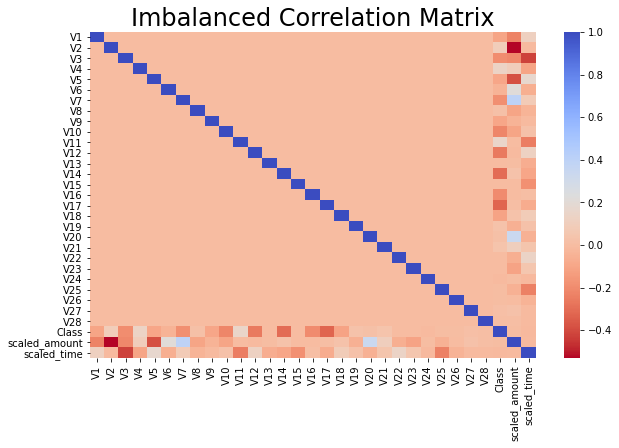

In [166]:
# Calculate pearson correlation coefficience

corr = dataset_scaled.corr() 

# Plot heatmap of correlation
f, ax = plt.subplots(1, 1, figsize=(10,6))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20})
ax.set_title("Imbalanced Correlation Matrix", fontsize=24)

In [167]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.009803
         Iterations 12
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.229    
Dependent Variable: Class            AIC:              5644.0027
Date:               2021-05-25 14:58 BIC:              5960.7897
No. Observations:   284807           Log-Likelihood:   -2792.0  
Df Model:           29               LL-Null:          -3621.2  
Df Residuals:       284777           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     12.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Time        -0.0001    0.0000  -55.8919  0.0000  -0.0001  -0.0001
V1           0.5835    0.0336   17.3521  0.0000   0.5176   0.6494
V2     

In [173]:
# Extract features from our scaled dataset scaled dataset

# Define the prep_data function to extrac features 
def prep_data(dataset):
    X = dataset.drop(['Class'],axis=1, inplace=False) #  
    X = np.array(X).astype(np.float)
    y = dataset[['Class']]  
    y = np.array(y).astype(np.float)
    return X,y

# Create X and y from the prep_data function 
X, y = prep_data(dataset_scaled)

In [174]:
# Resampling with ROS and SMOTE

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline # Inorder to avoid testing model on sampled data

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [176]:
# Define the resampling method

oversam = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)


In [179]:
# resample the training data

X_oversam, y_oversam = oversam.fit_resample(X_train,y_train)
X_smote, y_smote = smote.fit_resample(X_train,y_train)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_resample(X_train,y_train)

In [193]:
# Modelling with the Original dataset
#LOGISTIC CLASSIFIER

from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#predicting the test set

y_pred = logreg.predict(X_test)


# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

probs = logreg.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, probs[:, 1])
print('ROC AUC Score:',roc_auc)
print(classification_report(y_test, y_pred))
print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))

ROC AUC Score: 0.969354019041494
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    12]
 [   56    91]]


In [197]:
# Logistic Regression with Sampling methods

# Resample your training data
ros = RandomOverSampler()
smote = SMOTE(random_state=5)
blsmote = BorderlineSMOTE(kind='borderline-2',random_state=5)


X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_blsmote, y_train_blsmote = blsmote.fit_resample(X_train,y_train)

# Fit a logistic regression model to our data
ros_model = LogisticRegression().fit(X_train_ros, y_train_ros)
smote_model = LogisticRegression().fit(X_train_smote, y_train_smote)
blsmote_model = LogisticRegression().fit(X_train_blsmote, y_train_blsmote)



X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)
X_train_blsmote, y_train_blsmote = blsmote.fit_resample(X_train,y_train)

y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_blsmote = blsmote_model.predict(X_test)

In [201]:
print('Classifcation report:\n', classification_report(y_test, y_ros))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_ros))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_smote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_smote))
print('*'*25)

print('Classifcation report:\n', classification_report(y_test, y_blsmote))
print('Confusion matrix:\n', confusion_matrix(y_true = y_test, y_pred = y_blsmote))
print('*'*25)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.07      0.93      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83379  1917]
 [   11   136]]
*************************
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.06      0.92      0.11       147

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83170  2126]
 [   12   135]]
*************************
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0    

In [210]:
# Let try to balance the imbalnce dataset and see maybe there will be imporvement in our model
# Equal both the target samples to the same level
# take indexes of non fraudulent

nonfraud_indexies = dataset[dataset.Class == 0].index
fraud_indices = np.array(dataset[dataset['Class'] == 1].index)

# take random samples from non fraudulent that are equal to fraudulent samples
random_normal_indexies = np.random.choice(nonfraud_indexies, fraud, replace=False)
random_normal_indexies = np.array(random_normal_indexies)

In [211]:
## Undersampling techniques

# concatenate both indices of fraud and non fraud
under_sample_indices = np.concatenate([fraud_indices, random_normal_indexies])

#extract all features from whole data for under sample indices only
under_sample_data = dataset.iloc[under_sample_indices, :]

# now we have to divide under sampling data to all features & target
x_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data[['Class']]

# now split dataset to train and test datasets as before
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
x_undersample_data, y_undersample_data, test_size=0.3, random_state=0)

In [217]:
# Modelling Using Decision Tree with the Original dataset

## Building decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_pred = model.predict(X_test)

print('Classifcation report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_pred))
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred)}")


Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.81      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85269    27]
 [   35   112]]
AROC score :- 
 0.8807941085832195


In [124]:
# Modelling weith Decision Tree Using the Undersampled data

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

def decision_tree_classification(X_train, y_train, X_test, y_test):
    
 # initialize object for DecisionTreeClassifier class
 dt_classifier = DecisionTreeClassifier()
    
 # train model by using fit method
 print("Model training start........")
    
 dt_classifier.fit(X_train, y_train.values.ravel())
 print("Model training completed")
    
 acc_score = dt_classifier.score(X_test, y_test)
 print(f'Accuracy of model on test dataset :- {acc_score}')
    
 # predict result using test dataset
 y_pred = dt_classifier.predict(X_test)
    
 # confusion matrix
 print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
    
 # classification report for f1-score
 print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")
 print(f"AROC score :- \n {roc_auc_score(y_test, y_pred)}")

# calling decision tree classifier function 
decision_tree_classification(X_train_sample, y_train_sample, 
X_test_sample, y_test_sample)

Model training start........
Model training completed
Accuracy of model on test dataset :- 0.8851351351351351
Confusion Matrix :- 
 [[130  19]
 [ 15 132]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       149
           1       0.87      0.90      0.89       147

    accuracy                           0.89       296
   macro avg       0.89      0.89      0.89       296
weighted avg       0.89      0.89      0.89       296

AROC score :- 
 0.8852212025749898


In [207]:
# Oversampling for Decision Tree

# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
decisionTree = DecisionTreeClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', decisionTree)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_pred = pipeline.predict(X_test)

In [216]:
print('Classifcation report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_pred))
print(f"AROC score :- \n {roc_auc_score(y_test, y_pred)}")

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.55      0.74      0.63       147

    accuracy                           1.00     85443
   macro avg       0.78      0.87      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85207    89]
 [   38   109]]
AROC score :- 
 0.8702265866954548


In [125]:
# Using Random Forest on the Original dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def random_forest_classifier(X_train, y_train, X_test, y_test):
    
     # initialize object for DecisionTreeClassifier class
     rf_classifier = RandomForestClassifier(n_estimators=50)
    
     # train model by using fit method
     print("Model training starts........")
    
     rf_classifier.fit(X_train, y_train.values.ravel())
     acc_score = rf_classifier.score(X_test, y_test)
     print(f'Accuracy of model on test dataset :- {acc_score}')
        
     # predict result using test dataset
     y_pred = rf_classifier.predict(X_test)
        
     # confusion matrix
     print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")
        
     # classification report for f1-score
     print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


# calling random_forest_classifier
random_forest_classifier(X_train, y_train, X_test, y_test)

Model training starts........
Accuracy of model on test dataset :- 0.9994850368081645
Confusion Matrix :- 
 [[85289     7]
 [   37   110]]
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.75      0.83       147

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [126]:
# RandomForestClassifier after apply the undersampling techniques

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

def random_forest_classifier(X_train, y_train, X_test, y_test):
    
 # initialize object for DecisionTreeClassifier class
 rf_classifier = RandomForestClassifier(n_estimators=50)
    
 # train model by using fit method
 print("Model training start........")
    
 rf_classifier.fit(X_train, y_train.values.ravel())
 acc_score = rf_classifier.score(X_test, y_test)
 print(f'Accuracy of model on test dataset :- {acc_score}')

 # predict result using test dataset
 y_pred = rf_classifier.predict(X_test)

 # confusion matrix
 print(f"Confusion Matrix :- \n {confusion_matrix(y_test, y_pred)}")

 # classification report for f1-score
 print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

 # area under roc curve
 print(f"AROC score :- \n {roc_auc_score(y_test, y_pred)}")

random_forest_classifier(X_train_sample, y_train_sample, X_test_sample, y_test_sample)

Model training start........
Accuracy of model on test dataset :- 0.9391891891891891
Confusion Matrix :- 
 [[145   4]
 [ 14 133]]
Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       149
           1       0.97      0.90      0.94       147

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.94      0.94      0.94       296

AROC score :- 
 0.938958133589006


In [219]:
# Using the Over-Sampling Method called Smote

model = RandomForestClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_pred = pipeline.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)


In [221]:
print("AUC ROC score: ", roc_auc_score(y_test, probs[:,1]))
print('Classifcation report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n',  confusion_matrix(y_true = y_test, y_pred = y_pred))

AUC ROC score:  0.9657366041520717
Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.89      0.79      0.83       147

    accuracy                           1.00     85443
   macro avg       0.94      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85281    15]
 [   31   116]]


In [222]:
# GridSearchCV to find optimal parameters for Random Forest Classifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [223]:
# The Model result using the grid serachCV
# the result does not perform better
# Build a RandomForestClassifier using the GridSearchCV parameters
model = RandomForestClassifier(bootstrap=True,
                               class_weight = {0:1,1:12},
                               criterion = 'entropy',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_leaf = 10,
                               max_depth = 8,
                               n_jobs = -1,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


# Print the roc_auc_score,Classifcation report and Confusin matrix
probs = model.predict_proba(X_test)
print('roc_auc_score:', roc_auc_score(y_test,probs[:,1]))
print('Classification report:\n',classification_report(y_test,y_pred))
print('Confusion_matrix:\n',confusion_matrix(y_test,y_pred))

roc_auc_score: 0.9783260964299432
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     85296
         1.0       0.86      0.81      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion_matrix:
 [[85276    20]
 [   28   119]]
